In [1]:
%%markdown
## Assignment1
### -- Yuanjie Yue

## Assignment1
### -- Yuanjie Yue


In [2]:
%%markdown
### Preparation

### Preparation


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('./data/movie_lens_genre_separated.tsv', sep='\t')

In [5]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


In [6]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [7]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [8]:
ratings_by_title = data.groupby('title').size()

In [9]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            74
'Night Mother (1986)              70
'Til There Was You (1997)        104
'burbs, The (1989)               303
...And Justice for All (1979)    398
dtype: int64

In [10]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [11]:
active_titles[:5]

Index([''burbs, The (1989)', '...And Justice for All (1979)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)'],
      dtype='object', name='title')

In [12]:
mean_ratings = mean_ratings.loc[active_titles]

In [13]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [14]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [15]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


In [16]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [17]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261


In [18]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [19]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [20]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Cutthroat Island (1995),3.200000,2.341270,-0.858730
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Home Alone 3 (1997),2.486486,1.683761,-0.802726
That Darn Cat! (1997),3.156250,2.435484,-0.720766
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,-0.642857
"Pagemaster, The (1994)",3.146341,2.510638,-0.635703
Grease (1978),3.975265,3.367041,-0.608224
Herbie Goes Bananas (1980),2.965517,2.373333,-0.592184


In [21]:
occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [22]:
data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

In [23]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's


In [24]:
%%markdown
### Task 1 
An aggregate of the movie ratings for each particular genre.

### Task 1 
An aggregate of the movie ratings for each particular genre.


In [25]:
# One way is complete the task by leveraging 'Groupby' method
ratings_each_genre = data.groupby('genres').agg({'rating': [np.size, 
                                                            np.mean]})

In [26]:
ratings_each_genre

rating          
               size      mean
genres                       
Action       257457  3.491185
Adventure    133953  3.477257
Animation     43303  3.684895
Children's    72196  3.422087
Comedy       356590  3.522107
Crime         79541  3.708679
Documentary    7910  3.933123
Drama        354529  3.766332
Fantasy       36301  3.447371
Film-Noir     18261  4.075188
Horror        76386  3.215013
Musical       41533  3.665519
Mystery       40178  3.668102
Romance      147523  3.607465
Sci-Fi       157294  3.466521
Thriller     189680  3.570466
War           68527  3.893327
Western       20683  3.637770

In [27]:
%%markdown
### Task 2 
The top 5 highest ranked genre by occupation.

### Task 2 
The top 5 highest ranked genre by occupation.


In [28]:
# One way is using 'Pivot Table'
# get a table with genres as index and occupation as columns
rating_by_genre_by_occupation = data.pivot_table('rating', index='genres', columns='occupation')

In [29]:
rating_by_genre_by_occupation.head()

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genres,,,,,,,,,,,,,,,,,,,,,
Action,3.497116,3.392063,3.457569,3.549025,3.453687,3.494995,3.564004,3.568687,3.449309,3.601525,...,3.417847,3.575455,3.679048,3.528136,3.559685,3.510326,3.567827,3.475220,3.310577,3.339971
Adventure,3.425658,3.424278,3.443535,3.556486,3.419877,3.478934,3.553981,3.509195,3.397727,3.688992,...,3.425616,3.564958,3.650803,3.520496,3.567662,3.513258,3.560600,3.430316,3.287975,3.346110
Animation,3.463956,3.693399,3.624133,3.822104,3.655775,3.766940,3.681150,3.698059,3.529851,3.797980,...,3.674843,3.706839,3.545732,3.761057,3.847805,3.729696,3.734456,3.748663,3.395221,3.699623
Children's,3.220679,3.459286,3.377481,3.609614,3.346854,3.513463,3.485747,3.442969,3.229885,3.667447,...,3.438479,3.432778,3.485849,3.521694,3.592405,3.457459,3.481376,3.395288,2.973435,3.351509
Comedy,3.497200,3.519583,3.504449,3.601516,3.486595,3.474962,3.585793,3.517354,3.481363,3.579862,...,3.492581,3.598995,3.663825,3.553581,3.687170,3.507570,3.581307,3.445350,3.401392,3.423011


In [30]:
# loop through all the occupations
for key,value in occupation_dict.items():
    # do sort the data frame by each occupation in descendingly order and get the top 5 rows
    current_genres = rating_by_genre_by_occupation.sort_values(by=[value], ascending=False)[:5][value]
    print('occupation: ' + value)
    print(current_genres)
    print('----------------------------------\n')

occupation: not specified
genres
Film-Noir      4.058155
Documentary    3.854545
War            3.852334
Drama          3.743350
Animation      3.674843
Name: not specified, dtype: float64
----------------------------------

occupation: academic/educator
genres
Film-Noir      4.082613
Documentary    3.984887
War            3.882950
Drama          3.754293
Musical        3.701586
Name: academic/educator, dtype: float64
----------------------------------

occupation: artist
genres
Film-Noir      4.114000
Documentary    4.028933
War            3.859375
Drama          3.732216
Mystery        3.719645
Name: artist, dtype: float64
----------------------------------

occupation: clerical/admin
genres
Film-Noir      4.075332
War            3.927692
Musical        3.857049
Documentary    3.852632
Animation      3.822104
Name: clerical/admin, dtype: float64
----------------------------------

occupation: college/grad student
genres
Film-Noir      4.039548
Documentary    3.962887
War            3

In [31]:
%%markdown
### Task 3 
The most popular (with most ratings) movie by age group.

### Task 3 
The most popular (with most ratings) movie by age group.


In [32]:
most_popular_movie_by_age_group = data.pivot_table('rating', index='title', columns='age', aggfunc={'rating': np.size}).fillna(0)

In [33]:
most_popular_movie_by_age_group

age,18-24,25-34,35-44,45-49,50-55,56+,Under 18
title,,,,,,,
"$1,000,000 Duck (1971)",12.0,22.0,30.0,2.0,8.0,0.0,0.0
'Night Mother (1986),3.0,26.0,21.0,6.0,9.0,3.0,2.0
'Til There Was You (1997),16.0,48.0,20.0,6.0,4.0,6.0,4.0
"'burbs, The (1989)",90.0,115.0,55.0,11.0,24.0,6.0,2.0
...And Justice for All (1979),14.0,116.0,140.0,40.0,58.0,28.0,2.0
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.0,16.0,9.0,1.0,1.0,0.0,1.0
Zero Effect (1998),120.0,288.0,92.0,34.0,36.0,16.0,16.0
Zero Kelvin (Kj�rlighetens kj�tere) (1995),0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [34]:
# loop through the age dictionary 
for key, value in age_dict.items():
    # do sort by current age group in descending order and get the top one row
    current_most_popular_movie = most_popular_movie_by_age_group.sort_values(by=value, ascending=False)[value][:1]
    print('age_group: ' + value)
    print(current_most_popular_movie)
    print('----------------------------------\n')

age_group: Under 18
title
Star Wars: Episode VI - Return of the Jedi (1983)    500.0
Name: Under 18, dtype: float64
----------------------------------

age_group: 18-24
title
Star Wars: Episode VI - Return of the Jedi (1983)    2930.0
Name: 18-24, dtype: float64
----------------------------------

age_group: 25-34
title
Star Wars: Episode V - The Empire Strikes Back (1980)    5880.0
Name: 25-34, dtype: float64
----------------------------------

age_group: 35-44
title
Star Wars: Episode V - The Empire Strikes Back (1980)    2990.0
Name: 35-44, dtype: float64
----------------------------------

age_group: 45-49
title
Star Wars: Episode V - The Empire Strikes Back (1980)    1130.0
Name: 45-49, dtype: float64
----------------------------------

age_group: 50-55
title
Star Wars: Episode V - The Empire Strikes Back (1980)    1030.0
Name: 50-55, dtype: float64
----------------------------------

age_group: 56+
title
Star Wars: Episode V - The Empire Strikes Back (1980)    565.0
Name: 56+, dt

In [35]:
%%markdown
### Task 4 
A breakdown of a movie’s ratings by occupation, using any movie of your choice.

### Task 4 
A breakdown of a movie’s ratings by occupation, using any movie of your choice.


In [36]:
# Use the very first movie title
movie_title = data[:1].title[0]

In [37]:
movie_title

"Bug's Life, A (1998)"

In [38]:
data_of_movie_title = data[data.title == movie_title]

In [39]:
data_of_movie_title.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's


In [40]:
movie_break_down_rating_by_occupation = data_of_movie_title.pivot_table(index=['title'], columns=['occupation'], aggfunc={'rating':'mean'})

In [41]:
movie_break_down_rating_by_occupation

rating                                             \
occupation           K-12 student academic/educator    artist clerical/admin   
title                                                                          
Bug's Life, A (1998)     3.555556          3.951456  3.974359       3.903846   

                                                                               \
occupation           college/grad student customer service doctor/health care   
title                                                                           
Bug's Life, A (1998)                3.792              4.0           3.846154   

                                                            ...                \
occupation           executive/managerial farmer homemaker  ... not specified   
title                                                       ...                 
Bug's Life, A (1998)             3.798742   4.25    3.8125  ...      3.889401   

                                                                   \
occupation           programmer retired sales/marketing scientist   
title                                                               
Bug's Life, A (1998)   3.991525     4.0        3.829787  3.979592   

                                                                            \
occupation           self-employed technician/engineer tradesman/craftsman   
title                                                                        
Bug's Life, A (1998)      3.835616            3.883562            3.833333   

                                           
occupation           unemployed    writer  
title                                      
Bug's Life, A (1998)       3.68  3.768293  

[1 rows x 21 columns]

In [42]:
%%markdown
### Task 5  
A function that given a user id, returns: 
* (1) this user’s age and occupation
* (2) the average rating given by this user 
* (3) his highest and lowest rated movie(s)

### Task 5  
A function that given a user id, returns: 
* (1) this user’s age and occupation
* (2) the average rating given by this user 
* (3) his highest and lowest rated movie(s)


In [43]:
def checkUserRatingHistoryByUserId(user_id):
    userRatingHistory = data[data.user_id == user_id]
    res = {}
    if not userRatingHistory.empty:
        res['age'] = userRatingHistory['age'][0]
        res['occupation'] = userRatingHistory['occupation'][0]
        res['average_rating'] = userRatingHistory.mean()['rating']
        highestRating = userRatingHistory.max()['rating']
        lowestRating = userRatingHistory.min()['rating']
        ratingGroups = userRatingHistory.groupby('rating')
        res['highest_rated_movie'] = ratingGroups.get_group(highestRating)['title'].drop_duplicates(keep='first').reset_index()['title']
        res['lowest_rated_movie'] = ratingGroups.get_group(lowestRating)['title'].drop_duplicates(keep='first').reset_index()['title']
    else:
        print('User does not exist!')
    return res

In [44]:
checkUserRatingHistoryByUserId(2917)

{'age': '25-34',
 'occupation': 'not specified',
 'average_rating': 3.423611111111111,
 'highest_rated_movie': 0                                          Fargo (1996)
 1                        Raiders of the Lost Ark (1981)
 2                                   Pulp Fiction (1994)
 3                                          Crumb (1994)
 4                             North by Northwest (1959)
 5                   Hard-Boiled (Lashou shentan) (1992)
 6                                    Rear Window (1954)
 7                                   Citizen Kane (1941)
 8                                   Blade Runner (1982)
 9                                     Annie Hall (1977)
 10                                       Vertigo (1958)
 11            Killer, The (Die xue shuang xiong) (1989)
 12                          Strangers on a Train (1951)
 13                                   City Lights (1931)
 14                                   Raging Bull (1980)
 15                                

In [45]:
%%markdown
### Task 6 
Some other statistic, ﬁgure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

### Task 6 
Some other statistic, ﬁgure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.


In [46]:
%%markdown
#### 1. Genres by gender

#### 1. Genres by gender


In [47]:
rating_genres_by_gender = data.pivot_table('rating', index='genres',columns='gender')

In [48]:
male_rating_genres_by_gender = rating_genres_by_gender.sort_values(by='M',ascending=False)

In [49]:
male_rating_genres_by_gender.head()

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Drama,3.765662,3.766589
Crime,3.689332,3.713720


In [50]:
female_rating_genres_by_gender = rating_genres_by_gender.sort_values(by='F',ascending=False)

In [51]:
female_rating_genres_by_gender.head()

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Musical,3.809108,3.596332
Drama,3.765662,3.766589


In [52]:
rating_genres_by_gender['diff'] = rating_genres_by_gender['M'] - rating_genres_by_gender['F']

In [53]:
rating_genres_by_gender.head()

gender,F,M,diff
genres,,,
Action,3.490252,3.491386,0.001134
Adventure,3.512879,3.468125,-0.044753
Animation,3.744785,3.661336,-0.083449
Children's,3.572628,3.358998,-0.213630
Comedy,3.571955,3.503671,-0.068285


In [54]:
male_female_diff = rating_genres_by_gender.sort_values(by='diff',ascending=False)

In [55]:
male_female_diff

gender,F,M,diff
genres,,,
Western,3.551913,3.655120,0.103208
Film-Noir,4.018087,4.092254,0.074167
Crime,3.689332,3.713720,0.024388
Sci-Fi,3.450255,3.469952,0.019697
Horror,3.202870,3.217891,0.015021
Action,3.490252,3.491386,0.001134
Drama,3.765662,3.766589,0.000927
War,3.893138,3.893375,0.000237
Thriller,3.573360,3.569685,-0.003675


In [56]:
%%markdown
#### Observation
By observing result above, we could see the genres that both gender are tending to rating higher scores, 
an interesting fact is that the top 2 highest ranked genres for both genders are the same, they are the 
Film-Noir and Documentary.

We could also see the difference of the ratings on each genres from male and female. 
Men tend to give the Western genre higher rating, while women tend to give the Children's genre higher rating.
Both of the gender have similar rating for the War genre

#### Observation
By observing result above, we could see the genres that both gender are tending to rating higher scores, 
an interesting fact is that the top 2 highest ranked genres for both genders are the same, they are the 
Film-Noir and Documentary.

We could also see the difference of the ratings on each genres from male and female. 
Men tend to give the Western genre higher rating, while women tend to give the Children's genre higher rating.
Both of the gender have similar rating for the War genre


In [57]:
from matplotlib import pyplot as pp

In [58]:
%%markdown
#### 2. Rating Distribution Plot

#### 2. Rating Distribution Plot


In [59]:
# prepare the data
rating_groups = data.groupby('rating').size()

In [60]:
rating_groups.describe()

count         5.000000
mean     420369.000000
std      247618.781478
min      116603.000000
25%      227227.000000
50%      477937.000000
75%      550992.000000
max      729086.000000
dtype: float64

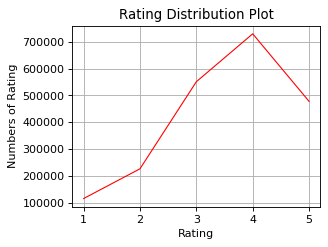

In [61]:
# draw a plot with the rating data by using pyplot
pp.figure(figsize=(4, 3), dpi=80)
pp.plot(rating_groups, color="red", linewidth=1.0, linestyle="-")
pp.xlabel('Rating')
pp.ylabel('Numbers of Rating')
pp.title('Rating Distribution Plot')
pp.grid(True)
pp.show()

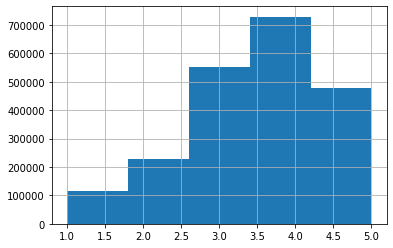

In [62]:
# we can also draw a pandas histogram
rating_histogram_distribution = data['rating'].hist(bins=5)

In [63]:
%%markdown
#### Observation
By observing the plot and histogram above, we could easily see that most of the users are giving the movies they watch a relatively higher rating.

Most of the ratings are around the 3, 4, 5 area, while the rating 1 and 2 is relatively fewer.

#### Observation
By observing the plot and histogram above, we could easily see that most of the users are giving the movies they watch a relatively higher rating.

Most of the ratings are around the 3, 4, 5 area, while the rating 1 and 2 is relatively fewer.


In [64]:
%%markdown
#### 3. User Age Group Distribution Plot

#### 3. User Age Group Distribution Plot


In [65]:
# prepare the data
user_age_groups = data.groupby('age').size().rename(index={'Under 18':'0-18'}).sort_index(ascending=True)

In [66]:
user_age_groups

age
0-18      58820
18-24    391848
25-34    831344
35-44    417543
45-49    173677
50-55    149791
56+       78822
dtype: int64

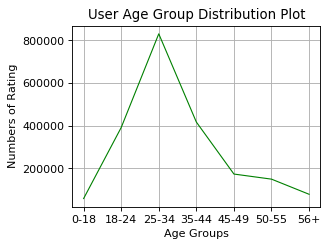

In [67]:
pp.figure(figsize=(4,3),dpi=80)
pp.plot(user_age_groups, color='green', linewidth=1.0, linestyle="-")
pp.xlabel('Age Groups')
pp.ylabel('Numbers of Rating')
pp.title('User Age Group Distribution Plot')
pp.grid(True)
pp.show()

In [68]:
%%markdown
#### Observation
By observing the plot above, the user age group distribution plot looks like a pyramid and its peak is the 25-34 group.

This result does make sense, people of this age loves to watch movie, they have time and they are energetic, while people of younger age may not have as much time and those of older age are less energetic 

#### Observation
By observing the plot above, the user age group distribution plot looks like a pyramid and its peak is the 25-34 group.

This result does make sense, people of this age loves to watch movie, they have time and they are energetic, while people of younger age may not have as much time and those of older age are less energetic 
